In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# reading the application data
app_data = pd.read_csv("application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# reading the previous application data
pre_app = pd.read_csv("previous_application.csv")
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#rows and columns in dataframe
app_data.shape

(307511, 122)

In [6]:
#checking information of all columns.
app_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
#checking percentage of null values which are present in each column of dataframe
null_values = app_data.isnull().sum()
((null_values/len(app_data))*100).sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [9]:
# columns having more than or equal to 50% null values
null_col = app_data.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >=(0.5*len(app_data))]
print(null_col)
print(len(null_col))

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_MEDI              208642
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_AVG             204488
YEARS_BUILD_MODE            204488
OWN_CAR_AGE                 202929
LANDAREA_MODE               182590
LANDAREA_AVG                182590
LANDAREA_MEDI               182590
BASEMENTAREA_MEDI           179943
BASEMENTAREA_AVG            179943
BASEMENTAREA_MODE           179943
EXT_SOURCE_1                173378
NONLIVINGAREA_MEDI          169682
NONLIVINGAREA_AVG           169682
NONLIVINGAREA_MODE          169682
ELEVATORS_MODE              163891
ELEVATORS_AVG       

In [10]:
null_col.index    

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE'],
      dtype='object')

In [11]:
#Drop these null columns
app_data.drop(columns= null_col.index, inplace=True)

In [12]:
#now the new dataframe after dropping the columns having more than 35% null values(41 columns)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
app_data.shape

(307511, 81)

In [14]:
null_values = app_data.isnull().sum()
((null_values/len(app_data))*100).sort_values(ascending=False).head(50)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [15]:
#columns which are having more than 15% null values
null_col1 = app_data.isnull().sum().sort_values(ascending = False)
null_col1 = null_col1[null_col1.values >=(0.15*len(app_data))]
print(null_col1)
print(len(null_col1))

FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
dtype: int64
10


In [16]:
## By observing the dataframe we find that only 'OCCUPATION_TYPE', 'EXT_SOURCE_3' seems to be relevant for our experiment so we will keep these bot columns and will drop all other columns.

In [17]:
null_col1.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"], inplace=True)
null_col1.index

Index(['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [18]:
app_data.drop(columns= null_col1.index, inplace=True)

In [19]:
app_data.shape  # Now we have 73 columns in our dataframe.

(307511, 73)

## Analysis of data and removing of unneccesary columns

In [20]:
# Now we have two values 'OCCUPATION_TYPE', 'EXT_SOURCE_3' which are having more than 15% of null values
#Lets see 'EXT_SOURCE_3' 

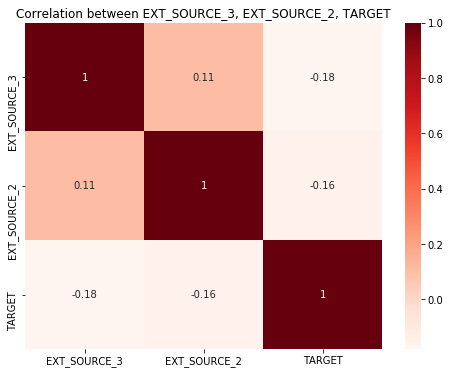

In [21]:
#We will see corelation between 'EXT_SOURCE_3' , 'EXT_SOURCE_2' and 'Target' by drawing a heatmap between them.
plt.figure(figsize= [8,6])
data = ['EXT_SOURCE_3','EXT_SOURCE_2']
sns.heatmap(app_data[data+["TARGET"]].corr(), cmap="Reds", annot=True)
plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET")
plt.show()

###### 1)So we got to know that there is no significant relationship between them and we decided to remove these column from dataframe.

In [22]:
#Drop the columns
app_data.drop(data, axis=1, inplace= True)

In [23]:
app_data.shape

(307511, 71)

In [24]:
# Now we have 71 columns left.

In [25]:
#Again checking for null values.
null = (app_data.isnull().sum()/len(app_data)*100).sort_values(ascending = False).head(50)
null.head(30)

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_CREDIT                     0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
NAME_CONTRACT_TYPE             0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_WORK_PHONE                0.000000
FLAG_EMP_PHONE                 0.000000


#### Lets handle missing values by observing them

###### Lets see those 'OCCUPATION_TYPE'

In [26]:
#Percentage of each category present in "OCCUPATION_TYPE"
app_data["OCCUPATION_TYPE"].value_counts(normalize=True)*100 

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

###### From here we can see that the column is categorical so we will impute a unknown which will have missing value.

In [27]:
#Filling missing values with "Unknown"
app_data["OCCUPATION_TYPE"] = app_data["OCCUPATION_TYPE"].fillna("Unknown") 

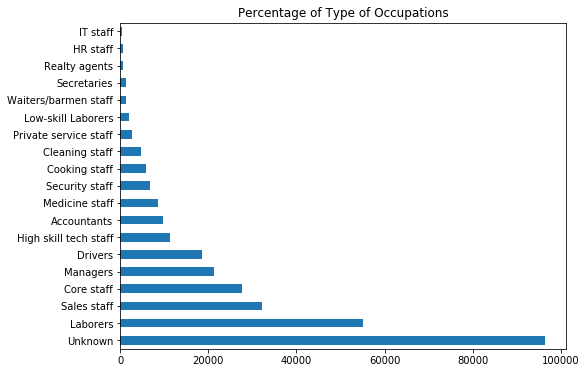

In [28]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"
plt.figure(figsize = [8,6])
(app_data["OCCUPATION_TYPE"].value_counts()).plot.barh()
plt.title("Percentage of Type of Occupations")
plt.show()

###### From this bar graph we can see that we have unknown values at first and Labores as second for occupation.

In [29]:
# We handeled all the columns which were having null values> 15%. Now Lets see the AMT columns for further analysis.

In [30]:
app_data[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


###### These above columns represent number of enquries made for the customer(which should be discrete and not continous).
###### From above we can see that all values are numerical and can conclude that for imputing missing values we should not use mean as it is in decimal form, so we will use median

In [31]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

app_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_data.AMT_REQ_CREDIT_BUREAU_MON.median(),inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

app_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.median(),inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

app_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_data.AMT_REQ_CREDIT_BUREAU_DAY.median(),inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

app_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

app_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_data.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT


In [32]:
# Now lets check for null values again.
null = (app_data.isnull().sum()/len(app_data)*100).sort_values(ascending = False).head(50)
null.head(30)

NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
OCCUPATION_TYPE                0.000000
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
FLAG_MOBIL                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
AMT_INCOME_TOTAL               0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000


In [33]:
# Still we have some null values present but they are even less then 1%.

In [34]:
# Now lets have a look at our dataframe again
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
app_data.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

###### We see that there are these values AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE which have very high values so we will make these numerical values to categorical values.

In [36]:
app_data['AMT_INCOME_TYPE'] = pd.qcut(app_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data['AMT_INCOME_TYPE'].head(20)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
11     VERY_LOW
12     VERY_LOW
13       MEDIUM
14       MEDIUM
15       MEDIUM
16          LOW
17     VERY_LOW
18          LOW
19     VERY_LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): [VERY_LOW < LOW < MEDIUM < HIGH < VERY_HIGH]

In [37]:
app_data['AMT_CREDIT_TYPE'] = pd.qcut(app_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data['AMT_CREDIT_TYPE'].head(20)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
11     VERY_LOW
12     VERY_LOW
13         HIGH
14       MEDIUM
15          LOW
16          LOW
17          LOW
18     VERY_LOW
19       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): [VERY_LOW < LOW < MEDIUM < HIGH < VERY_HIGH]

In [38]:
app_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [39]:
app_data['AMT_GOODS_PRICE_1'] = pd.qcut(app_data.AMT_GOODS_PRICE, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data['AMT_GOODS_PRICE_1'].head(20)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4        MEDIUM
5        MEDIUM
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
11     VERY_LOW
12     VERY_LOW
13       MEDIUM
14       MEDIUM
15          LOW
16          LOW
17          LOW
18     VERY_LOW
19       MEDIUM
Name: AMT_GOODS_PRICE_1, dtype: category
Categories (5, object): [VERY_LOW < LOW < MEDIUM < HIGH < VERY_HIGH]

In [40]:
app_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

#### Now lets deal with columns which are having negative values.

In [41]:
# We can see "DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE" columns have negative values.
app_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [42]:
neg_days = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]
app_data[neg_days]= abs(app_data[neg_days])

In [43]:
#Lets again check the values.
app_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0
...,...,...,...,...,...
307506,9327.0,236.0,8456.0,1982.0,273.0
307507,20775.0,365243.0,4388.0,4090.0,0.0
307508,14966.0,7921.0,6737.0,5150.0,1909.0
307509,11961.0,4786.0,2562.0,931.0,322.0


####Let’s Bin 'DAYS_BIRTH' and 'DAYS_EMPLOYED' 

In [44]:
app_data["DAYS_BIRTH"] = (app_data["DAYS_BIRTH"]/365).astype(int)
app_data['AGE_GROUP']=pd.cut(app_data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
app_data['AGE_GROUP'].head(20)

0     Very_Young
1     Middle_Age
2     Middle_Age
3     Middle_Age
4     Middle_Age
5     Middle_Age
6     Middle_Age
7     Middle_Age
8     Middle_Age
9     Middle_Age
10         Young
11    Middle_Age
12    Middle_Age
13    Middle_Age
14    Middle_Age
15    Very_Young
16         Young
17         Young
18    Middle_Age
19         Young
Name: AGE_GROUP, dtype: category
Categories (4, object): [Very_Young < Young < Middle_Age < Senior_Citizen]

In [45]:
# check the datatype of columns
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [46]:
#Following column datatype need to be changed.
app_data['NAME_CONTRACT_TYPE'] = app_data['NAME_CONTRACT_TYPE'].astype('category')
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].astype('category')
app_data['NAME_TYPE_SUITE'] = app_data['NAME_TYPE_SUITE'].astype('category')
app_data['NAME_INCOME_TYPE'] = app_data['NAME_INCOME_TYPE'].astype('category')
app_data['NAME_EDUCATION_TYPE'] = app_data['NAME_EDUCATION_TYPE'].astype('category')
app_data['NAME_FAMILY_STATUS'] = app_data['NAME_FAMILY_STATUS'].astype('category')
app_data['NAME_HOUSING_TYPE'] = app_data['NAME_HOUSING_TYPE'].astype('category')
app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].astype('category')
app_data['WEEKDAY_APPR_PROCESS_START'] = app_data['WEEKDAY_APPR_PROCESS_START'].astype('category')
app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].astype('category')

In [47]:
# Here are some columns which don’t add any value to our analysis, so we will simply drop them so that the data looks clear.
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
app_data.drop(labels=unwanted,axis=1,inplace=True)

In [48]:
app_data.shape

(307511, 47)

In [49]:
# Now we are left with 47 columns.

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
# Numerical columns after deletion of unwanted columns.
num_col = app_data.select_dtypes(include='number').columns
len(num_col)

31

### Outliers

In [52]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.435968,67724.742149,4986.120328,2994.202373,2.152665,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,1.422245,0.143421,1.405292,0.100049,962.858788,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.954593,139443.751806,3522.886321,1509.450419,0.910682,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,2.400989,0.446698,2.379803,0.362291,826.808487,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.000000,933.000000,2010.000000,1720.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.000000,2219.000000,4504.000000,3254.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.000000,5707.000000,7479.500000,4299.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,365243.000000,24672.000000,7197.000000,20.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


###### From describe we can see all the columns those have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below

In [53]:
outlier_columns = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

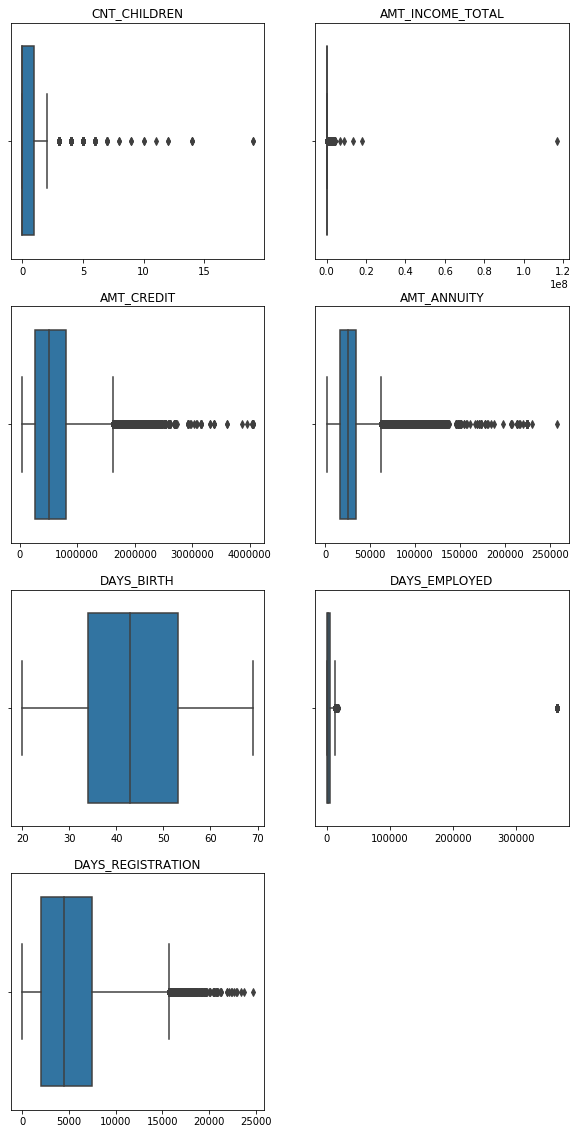

In [54]:
import itertools
plt.figure(figsize=[10,20])
for i,j in itertools.zip_longest(outlier_columns, range(len(outlier_columns))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = app_data[i], orient = "h")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

###### From the boxplot we can see that 
###### 1)AMT_ANNUITY, AMT_CREDIT,CNT_CHILDREN have some number of outliers.
###### 2)AMT_INCOME_TOTAL has large number of outliers which tells us that few of the loan applicants have high income.
###### 3)DAYS_BIRTH has no outliers

## Previous_application Data

In [55]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
pre_app.shape

(1670214, 37)

In [57]:
pre_app.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [58]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [59]:
null_values_preapp = pre_app.isnull().sum()
((null_values_preapp/len(pre_app))*100).sort_values(ascending=False).head(35)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [60]:
# columns having more than or equal to 50% null values
null_col_preapp = pre_app.isnull().sum().sort_values(ascending = False)
null_col_preapp = null_col_preapp[null_col_preapp.values >=(0.5*len(pre_app))]
print(null_col_preapp)
print(len(null_col_preapp))

RATE_INTEREST_PRIVILEGED    1664263
RATE_INTEREST_PRIMARY       1664263
RATE_DOWN_PAYMENT            895844
AMT_DOWN_PAYMENT             895844
dtype: int64
4


In [61]:
null_col_preapp.index

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY',
       'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT'],
      dtype='object')

In [62]:
#Drop these null columns
pre_app.drop(columns= null_col_preapp.index, inplace=True)

In [63]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
pre_app.shape

(1670214, 33)

In [65]:
null_values_preapp = pre_app.isnull().sum()
((null_values_preapp/len(pre_app))*100).sort_values(ascending=False).head(35)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DUE                 40.298129
DAYS_TERMINATION               40.298129
DAYS_FIRST_DRAWING             40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE

In [66]:
null_col_preapp = pre_app.isnull().sum().sort_values(ascending = False)
null_col_preapp = null_col_preapp[null_col_preapp.values >=(0.15*len(pre_app))]
print(null_col_preapp)
print(len(null_col_preapp))

NAME_TYPE_SUITE              820405
DAYS_FIRST_DUE               673065
DAYS_TERMINATION             673065
DAYS_FIRST_DRAWING           673065
NFLAG_INSURED_ON_APPROVAL    673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
AMT_GOODS_PRICE              385515
AMT_ANNUITY                  372235
CNT_PAYMENT                  372230
dtype: int64
10


In [67]:
null_col_preapp.index

Index(['NAME_TYPE_SUITE', 'DAYS_FIRST_DUE', 'DAYS_TERMINATION',
       'DAYS_FIRST_DRAWING', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_PAYMENT'],
      dtype='object')

In [68]:
pre_app[null_col_preapp.index].describe()

,DAYS_FIRST_DUE,DAYS_TERMINATION,DAYS_FIRST_DRAWING,NFLAG_INSURED_ON_APPROVAL,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,13826.269337,81992.343838,342209.855039,0.332570,33767.774054,76582.403064,2.278473e+05,1.595512e+04,1.605408e+01
std,72444.869708,153303.516729,88916.115834,0.471134,106857.034789,149647.415123,3.153966e+05,1.478214e+04,1.456729e+01
min,-2892.000000,-2874.000000,-2922.000000,0.000000,-2801.000000,-2889.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1628.000000,-1270.000000,365243.000000,0.000000,-1242.000000,-1314.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,-831.000000,-499.000000,365243.000000,0.000000,-361.000000,-537.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,-411.000000,-44.000000,365243.000000,1.000000,129.000000,-74.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,1.000000,365243.000000,365243.000000,6.905160e+06,4.180581e+05,8.400000e+01


###### We will keep the missing values of 'DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'

In [69]:
prev_days = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

In [70]:
# Converting Negative days to positive days
pre_app[prev_days] = abs(pre_app[prev_days])
pre_app[null_col_preapp.index].describe()

,DAYS_FIRST_DUE,DAYS_TERMINATION,DAYS_FIRST_DRAWING,NFLAG_INSURED_ON_APPROVAL,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,15949.224065,83505.775017,342340.056543,0.332570,35163.363265,78152.730207,2.278473e+05,1.595512e+04,1.605408e+01
std,72007.270877,152484.418802,88413.495220,0.471134,106405.950190,148833.342466,3.153966e+05,1.478214e+04,1.456729e+01
min,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,475.000000,447.000000,365243.000000,0.000000,257.000000,455.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,921.000000,1171.000000,365243.000000,0.000000,741.000000,1155.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,1825.000000,2501.000000,365243.000000,1.000000,1735.000000,2418.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,1.000000,365243.000000,365243.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [71]:
pre_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [72]:
#Dropping unneccesary columns 
Un_pre = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
pre_app.drop(Un_pre,axis =1, inplace = True)
pre_app.shape

(1670214, 29)

In [73]:
#  Filling "Unknown" to NAME_TYPE_SUITE
pre_app["NAME_TYPE_SUITE"] = pre_app["NAME_TYPE_SUITE"].fillna("Unknown")

In [74]:
null_values_preapp = pre_app.isnull().sum()
((null_values_preapp/len(pre_app))*100).sort_values(ascending=False).head(35)

NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_TERMINATION             40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_CONTRACT_STATUS          0.000000
NAME_CASH_LOAN_PURPOSE        0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_APPLICATION               0.000000
NAME_PAYMENT_TYPE             0.000000
SK_ID_CURR                    0.000000
DAYS_DECISION                 0.000000
NAME_GOODS_CATEGORY           0.000000
CODE_REJECT_REASON            0.000000
NAME_TYPE_SUITE               0.000000
NAME_CLIENT_TYPE              0.000000
NAME_PORTFOLIO                0.000000
NAME_PRODUCT_TYPE             0.000000
CHANNEL_TYPE                  0.000000
SELLERPLACE_AREA         

###### From above we can see that AMT_ANNUITY is numerical and can conclude that for imputing missing values we should not use mean as it is in decimal form, so we will use median

In [75]:
pre_app['AMT_ANNUITY'].fillna(pre_app['AMT_ANNUITY'].median(),inplace = True)

In [76]:
pre_app['AMT_GOODS_PRICE'].fillna(pre_app['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [77]:
pre_app['CNT_PAYMENT'].fillna(0,inplace = True)

In [78]:
#days group calculation e.g. 369 will be grouped as with in 2 years
bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
pre_app['YEARLY_DECISION'] = pd.cut(pre_app['DAYS_DECISION'],bins,labels=slots)
pre_app['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

###### Almost 35% loan applicatants have applied for a new loan within 1 year of previous loan decision

In [79]:
#Converting columns from Object to categorical 
prev_cat_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in prev_cat_col:
    pre_app[col] =pd.Categorical(pre_app[col])

### Outliers

In [80]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,8.806797e+02,3.139511e+02,1.247621e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.790997e+02,7.127443e+03,1.447588e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,2.800000e+02,-1.000000e+00,0.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,5.810000e+02,3.000000e+00,1.000000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [81]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  category
 3   AMT_ANNUITY                1670214 non-null  float64 
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  category
 8   NAME_CONTRACT_STATUS       1670214 non-null  category
 9   DAYS_DECISION              1670214 non-null  float64 
 10  NAME_PAYMENT_TYPE          1670214 non-null  category
 11  CODE_REJECT_REASON         1670214 non-null  category
 12  NAME_TYPE_SUITE            1670214 non-null  object  
 1

In [82]:
pre_outlier_columns = ['AMT_ANNUITY','AMT_CREDIT']

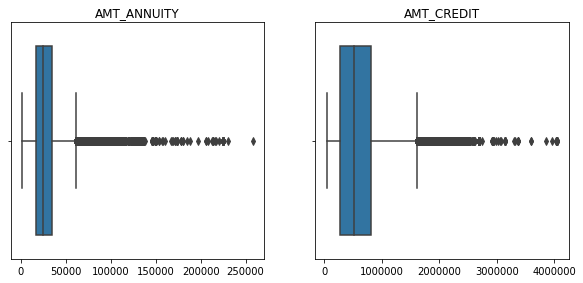

In [83]:
plt.figure(figsize=[10,20])
for i,j in itertools.zip_longest(pre_outlier_columns, range(len(pre_outlier_columns))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = app_data[i], orient = "h")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

## Handling Imbalance data

In [84]:
Target0 = app_data.loc[app_data["TARGET"]==0]
Repayer_per = round((len(Target0)/len(app_data)* 100),2)      # Here Repayers are people who don't have any payment difficulties
print(Repayer_per)
Target1 = app_data.loc[app_data["TARGET"]==1]
Defaluter_per = round((len(Target1)/len(app_data)* 100),2)    # Here Defaluters are people who have any payment difficulties
print(Defaluter_per)

91.93
8.07


In [85]:
round(Repayer_per/Defaluter_per,2)

11.39

###### The Repayer percentage is 91.93%
###### The Defaluter percentage is 8.07%
###### The imbalance ratio is 11.39

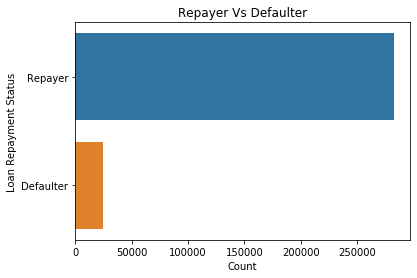

In [86]:
# Lets draw a bar graph for the imbalance data
sns.barplot(y=["Repayer","Defaulter"], x = app_data["TARGET"].value_counts())
plt.ylabel("Loan Repayment Status")
plt.xlabel("Count")
plt.title("Repayer Vs Defaulter")
plt.show()

## Univariate Analysis

### Lets see each value wrt target variable

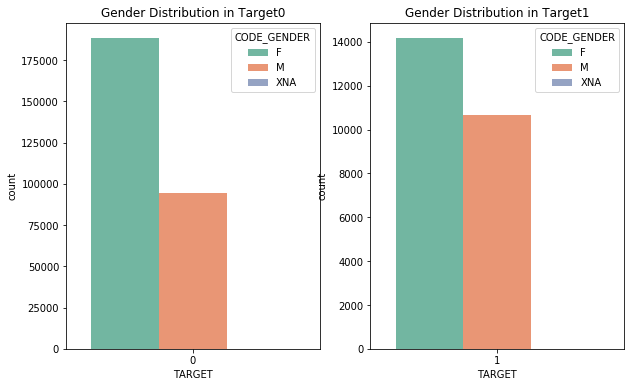

In [87]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")
plt.show()

###### We can see that Female clients applied higher than male clients for loan.

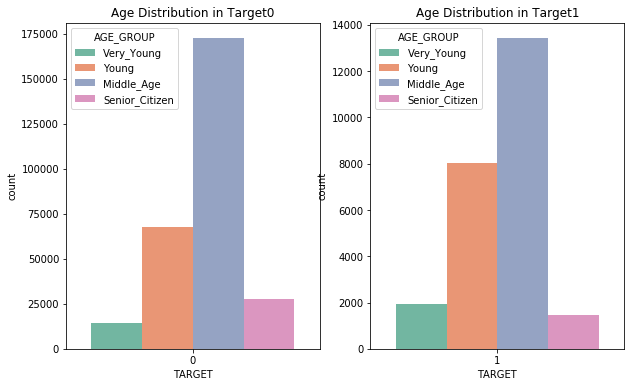

In [88]:
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.title("Age Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.title("Age Distribution in Target1")
plt.show()

Text(0.5, 1.0, 'Age Distribution')

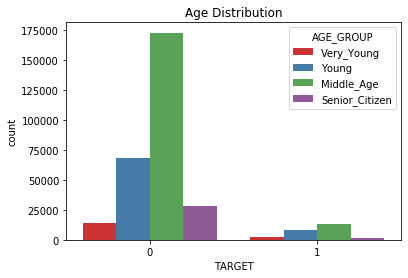

In [89]:
sns.countplot(x='TARGET',hue='AGE_GROUP',data=app_data,palette='Set1')
plt.title("Age Distribution")

###### Middle Age(35-60) the group have applied higher than any other age group for loans in the case of Defaulters as well as Non-defaulters.
###### Very Young and Senior citizens have applied very less for loan.

<Figure size 864x576 with 0 Axes>

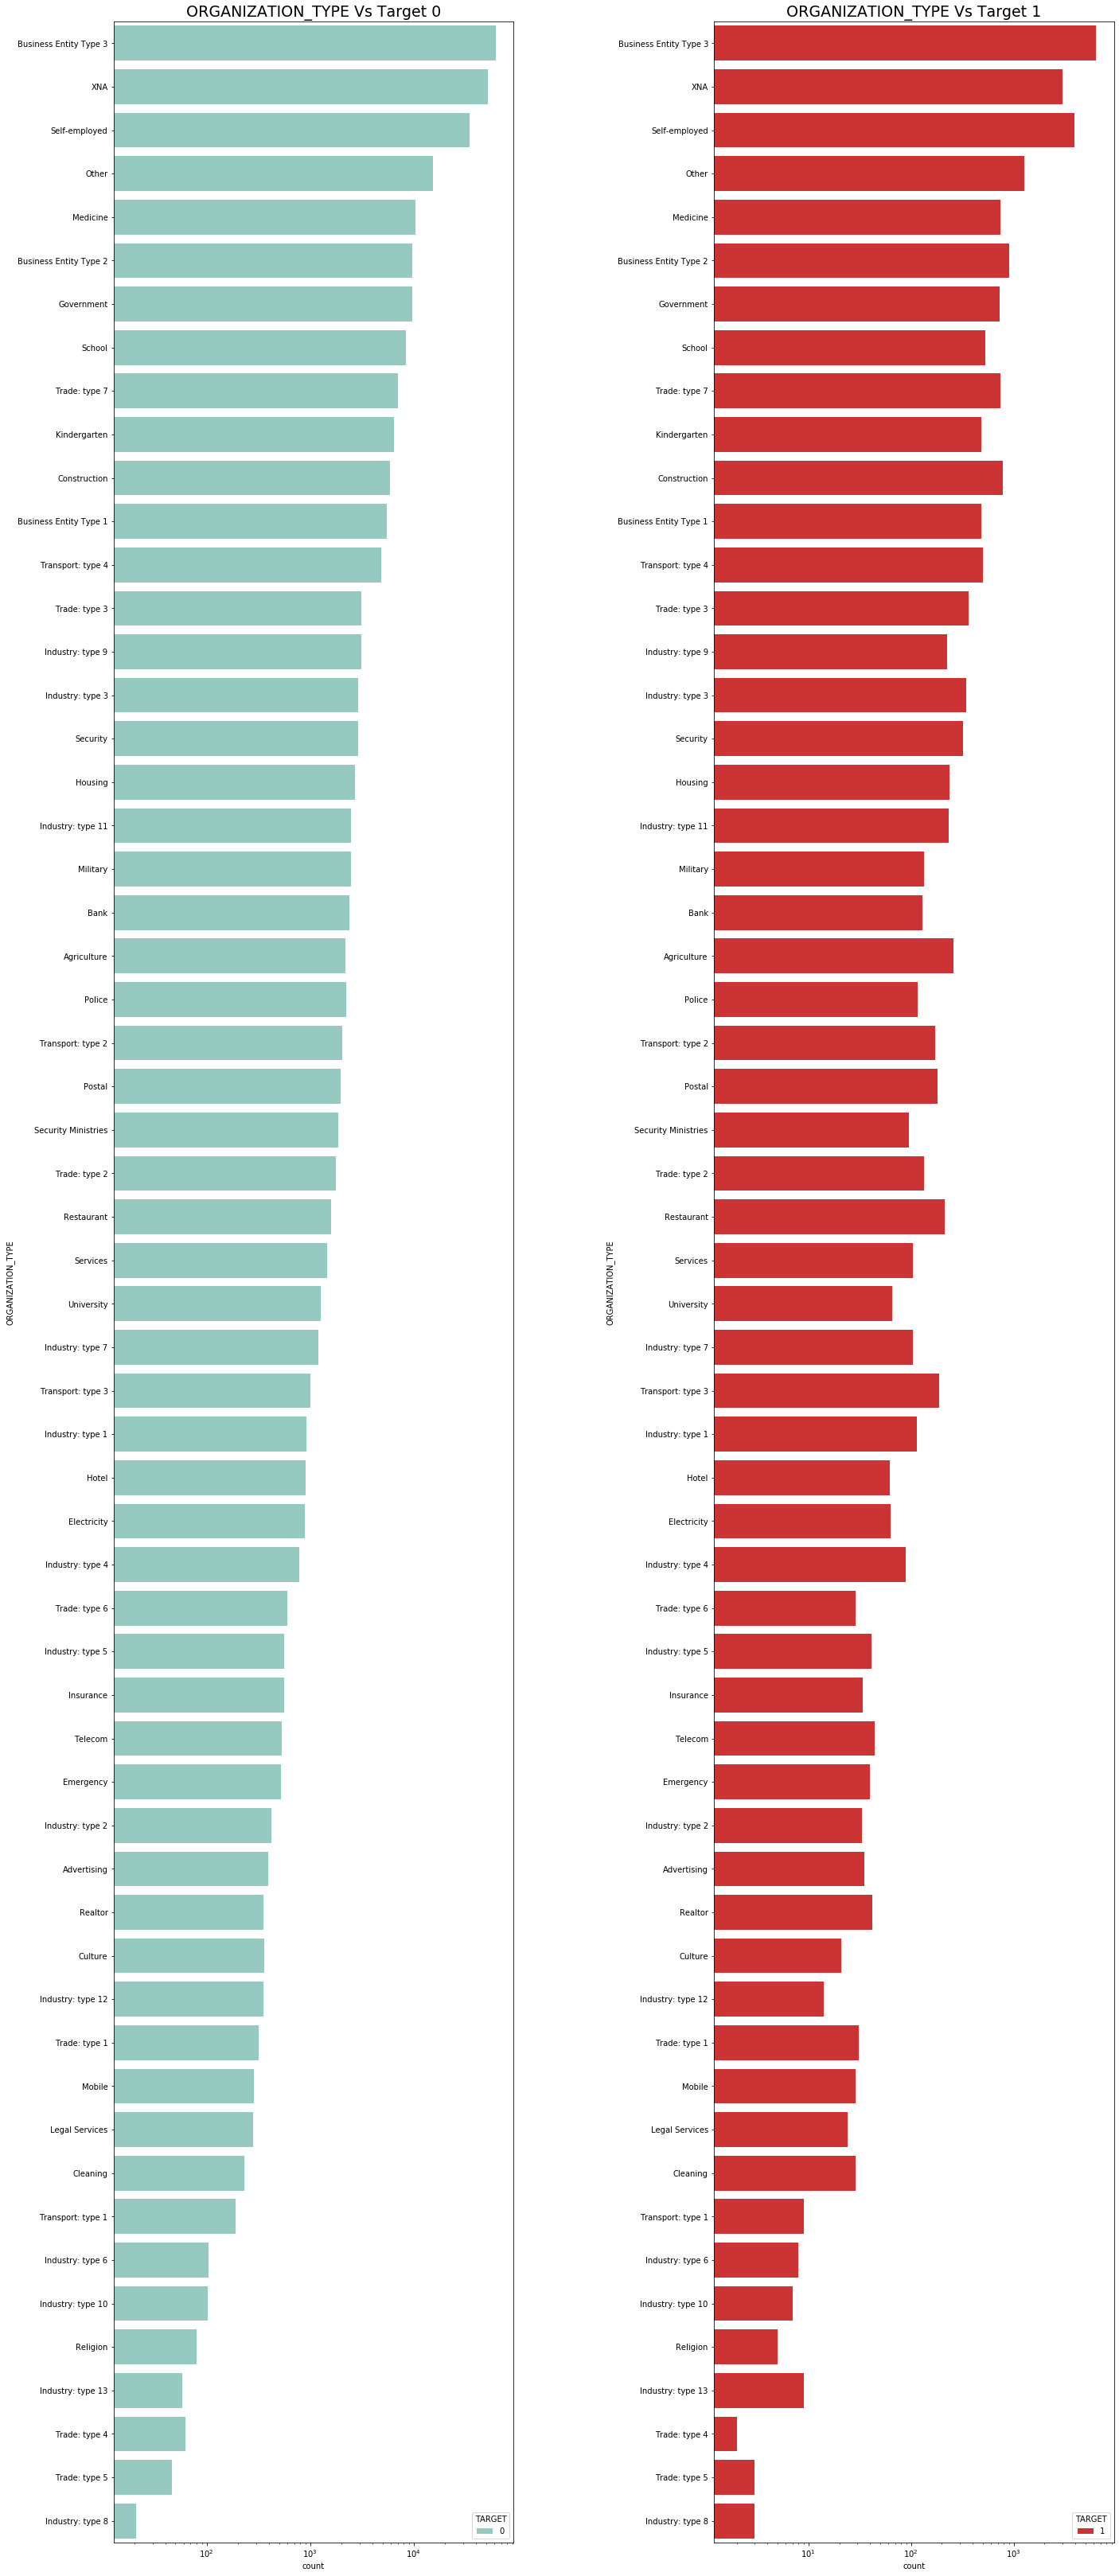

In [90]:
plt.figure(figsize=(12,8))
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 
plt.subplot(121)
plt.xscale('log')                                                                             # For Target0      
sns.countplot(data=Target0,y='ORGANIZATION_TYPE', order=app_data['ORGANIZATION_TYPE'].value_counts().index, palette='Set3', hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0", fontdict = {"fontsize":19})
plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE', order=app_data['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1", fontdict = {"fontsize":19})
plt.show();

###### ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 have applied the most for the loan for both defaluters and non-defaluters as compared to others.
######  ORGANIZATION_TYPE Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8 applied lower for the loan for both defaluters and non-defaluters as compared to others.

In [91]:
# Now we see that creating a plot for each feature manually is becoming a too tedious task. So we will define a function and use a loop to iterate through each categorical column.

In [92]:
# Lets create a list of all categorical columns.
cat_col = list(app_data.select_dtypes(include= 'category').columns) 
# Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP' because we have already taken up the isights from  above plots
cat_col.remove('ORGANIZATION_TYPE') 
cat_col.remove('CODE_GENDER')
cat_col.remove('AGE_GROUP')
cat_col

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE',
 'AMT_GOODS_PRICE_1']

In [93]:
def cat_plot(v):
    plt.figure(figsize=(12,6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(v, data=Target0, palette = 'Set3', hue='TARGET') 
    plt.xlabel(v)                                                         #Target 0
    plt.ylabel('Non Payment Difficulties')
    plt.xticks(rotation=90)
    plt.yticks(rotation=360)
    
    plt.subplot(1, 2, 2)
    sns.countplot(v, data=Target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(v)
    plt.ylabel('Payments Difficulties')
    plt.xticks(rotation=90)
    plt.yticks(rotation=360)
    plt.show()

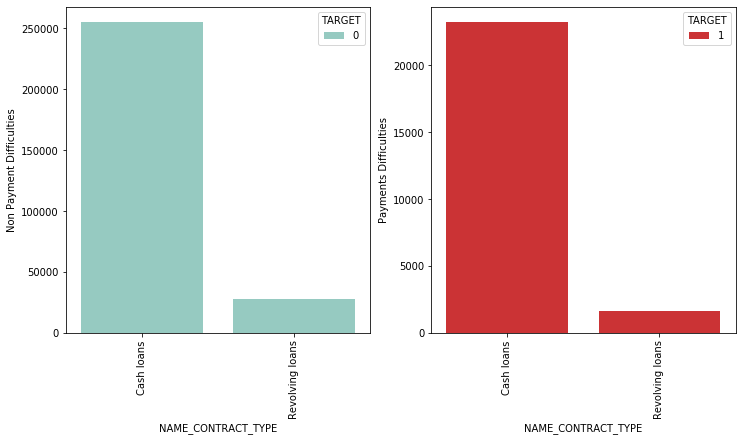

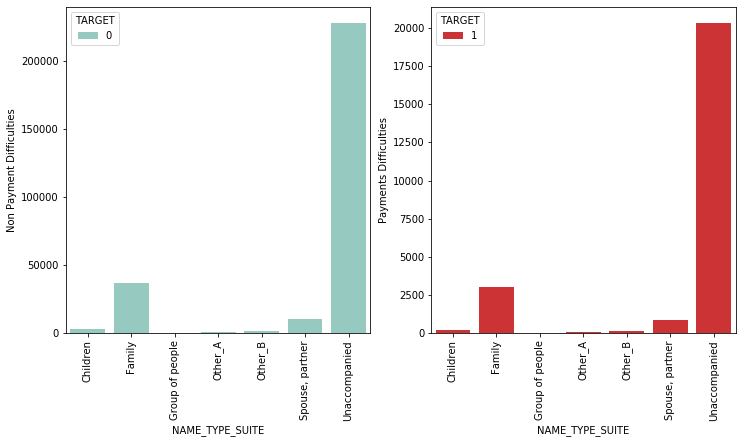

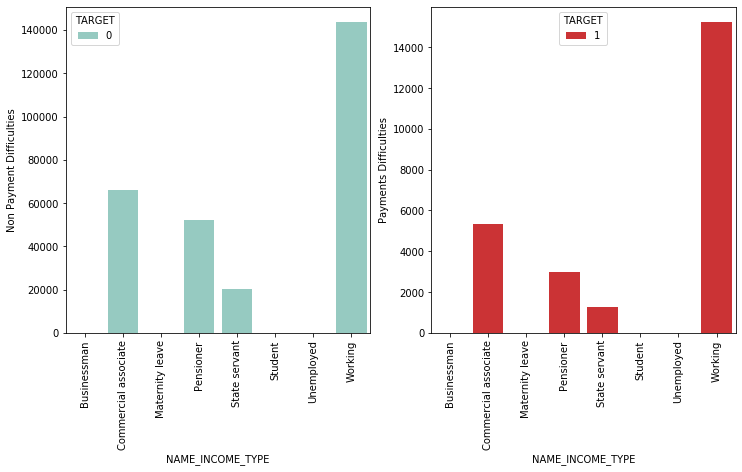

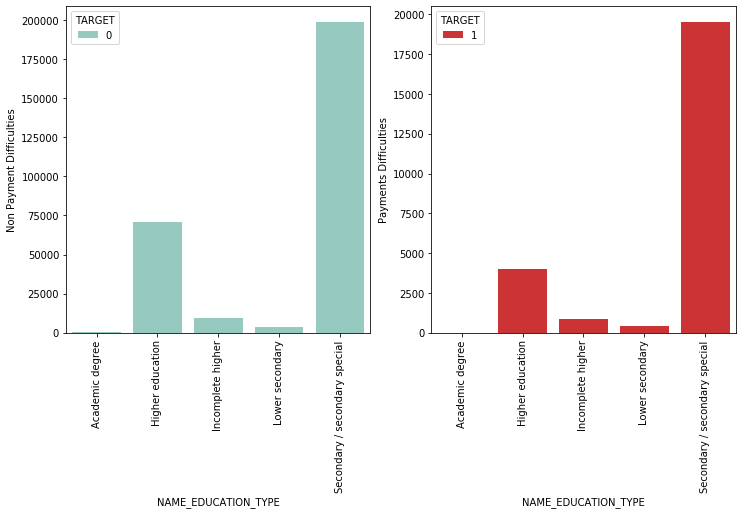

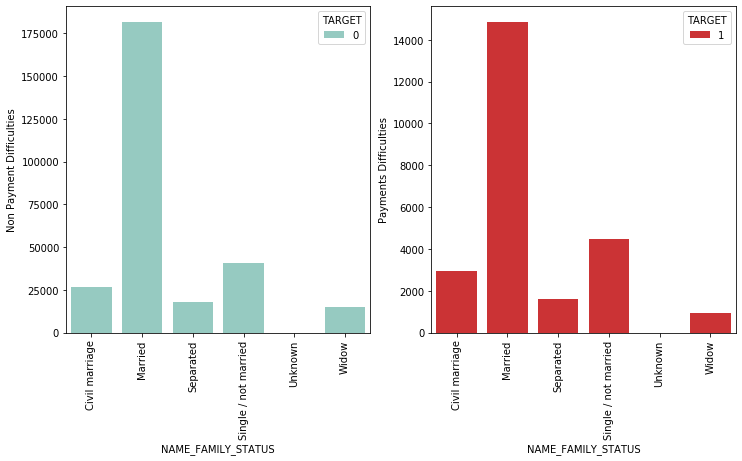

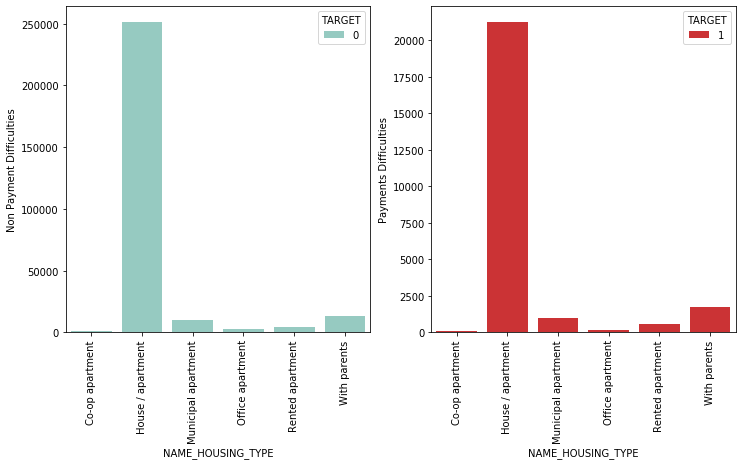

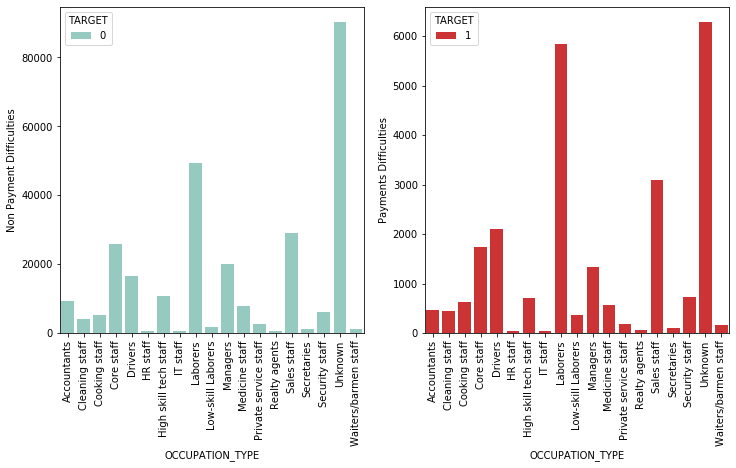

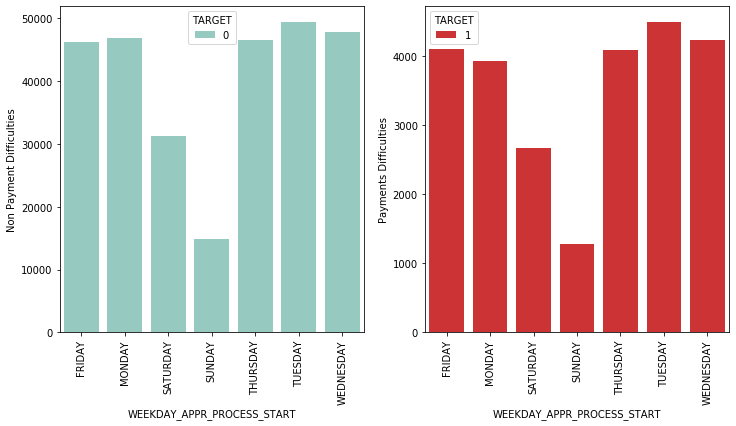

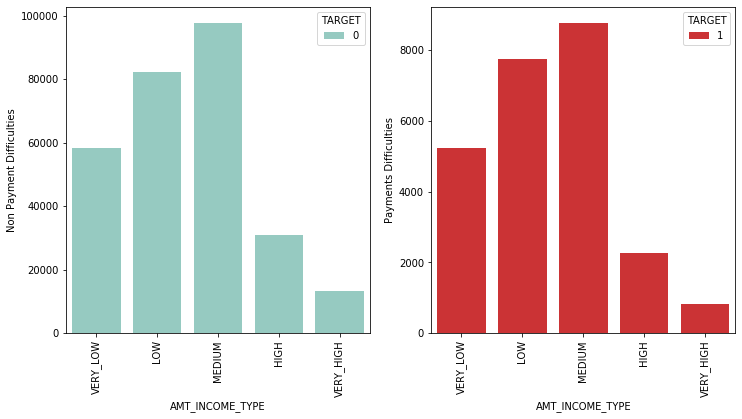

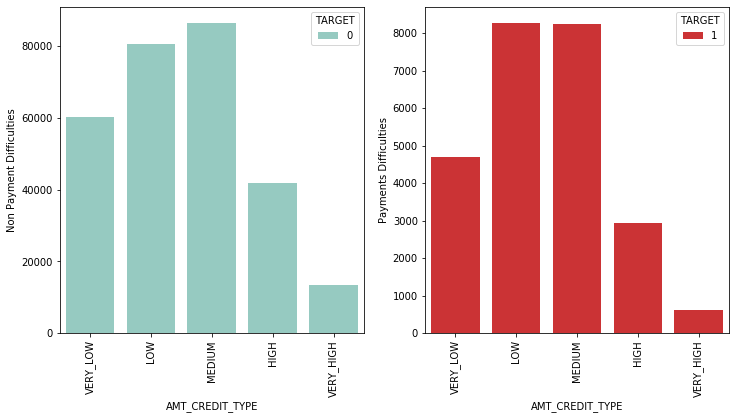

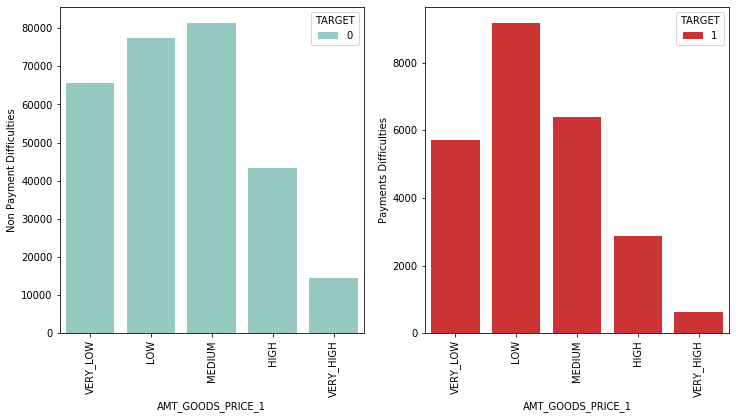

In [94]:
for cat in cat_col:
    cat_plot(cat)

###### 1)Most of the clients have applied for Cash Loan while very less have applied for Revolving loan for both Defaulters as well as Non-defaulters.
###### 2)AMT_GOODS_PRICE with medium value have highest applied for loan for Non defaulters and for defaulters both low and medium values applied for loan.
###### 3) Most of the clients were unaccompanied while applying for the loan and with few clients a family member was accompanying for both Defaulters and Non-Defaulters. But who was accompanying client while applying for the loan doesn’t impact on the default.Also both the populations have same proportions.
###### 4)Working,Commercial associate and Pensioner are more likely to apply for the loan, highest being the Working class category. Businessman, students and Unemployedless likely to apply for loan . Working category have high risk to default. State Servant is at Minimal risk to default.
###### 5)Very few clients have an academic degree. Secondary or Secondary Special education are more likey to apply for the loan and they are at higher risk to default.People with Academic degree are least likely to default. 
###### 6)Married person seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters. In case of Defaulters,people having single relationship or widows are less risky. 
###### 7)Most of the clients own a house or living in a apartment for both Defaulters and Non-Defaulters.
###### 8)There is no noticable difference in days for both Defaulters and Non-defaulters.
###### 9)Medium salary range people are more likely to apply for the loan for both Defaulters and Non-defaulters. people having low and medium income are at high risk to default.
###### 10)people applied for Medium Credit Amount of the loan for both Defaulters and Non-defaulters.


### Numerical Univariate Analysis

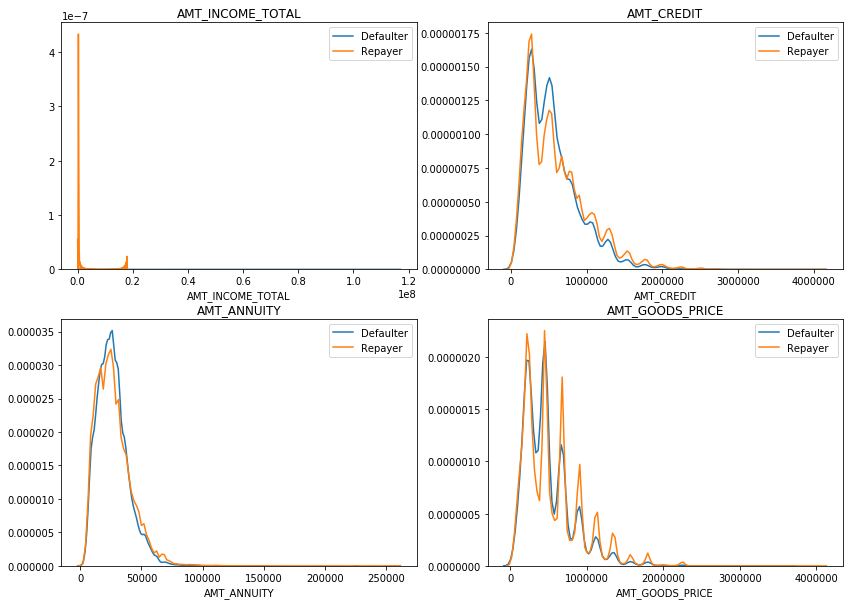

In [95]:
# Plotting the numerical columns
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]
plt.figure(figsize=(14,10))
for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Target1[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Target0[i[1]], hist=False, label ="Repayer")
    plt.title(i[1])
    plt.legend()
plt.show()

###### 1)The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision.
###### 2)Credit amount of the loan is mostly less then 10 lakhs.
###### 3)Most people pay annuity below 50K for the credit loan.
###### 4)Most no of loans are given for goods price below 10 lakhs.

## Bivariate Analysis

In [96]:
app_data[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

,TARGET,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS
0,1,202500.0,Secondary / secondary special,Single / not married
1,0,270000.0,Higher education,Married
2,0,67500.0,Secondary / secondary special,Single / not married
3,0,135000.0,Secondary / secondary special,Civil marriage
4,0,121500.0,Secondary / secondary special,Single / not married
...,...,...,...,...
307506,0,157500.0,Secondary / secondary special,Separated
307507,0,72000.0,Secondary / secondary special,Widow
307508,0,153000.0,Higher education,Separated
307509,1,171000.0,Secondary / secondary special,Married


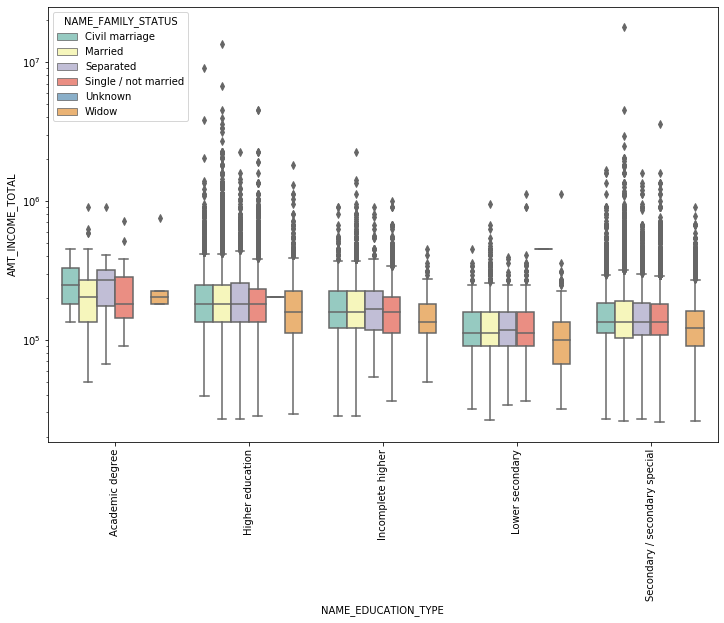

In [97]:
plt.figure(figsize=(12,8)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)
sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v',palette='Set3') #Boxplot w.r.t Data Target 0 
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()

###### 1)Widow with Academic degree have very few outliers and all people having academic degree have very less outliers.
###### 2)People having Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers with Higher education being the largest.
###### 3)Some of the people who haven’t completed their Higher Education have higher income and some of the people having Secondary/Secondary Special Education have higher incomes.

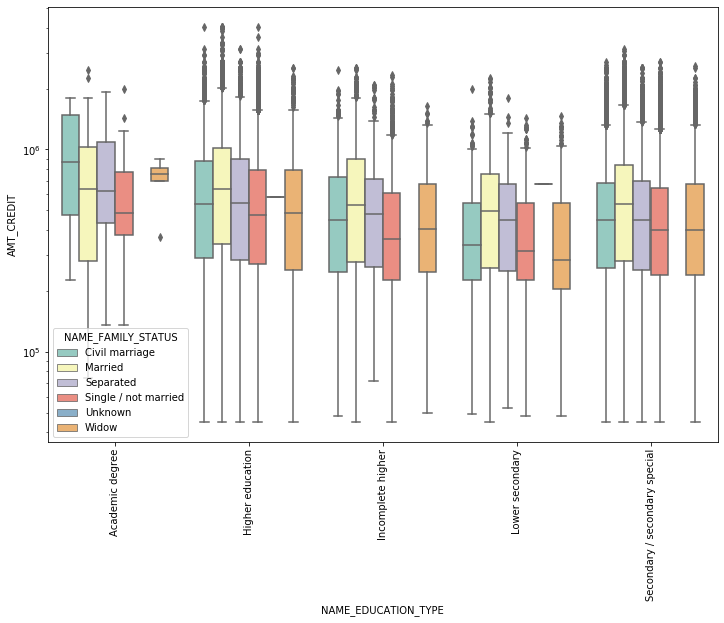

In [98]:
plt.figure(figsize=(12,8)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)
sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette='Set3') #Boxplot w.r.t Data Target 0
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()

###### 1)Widow with acedamic degree are taking more credit loan.
###### 2)People with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.

### Numerical Bivariate Analysis

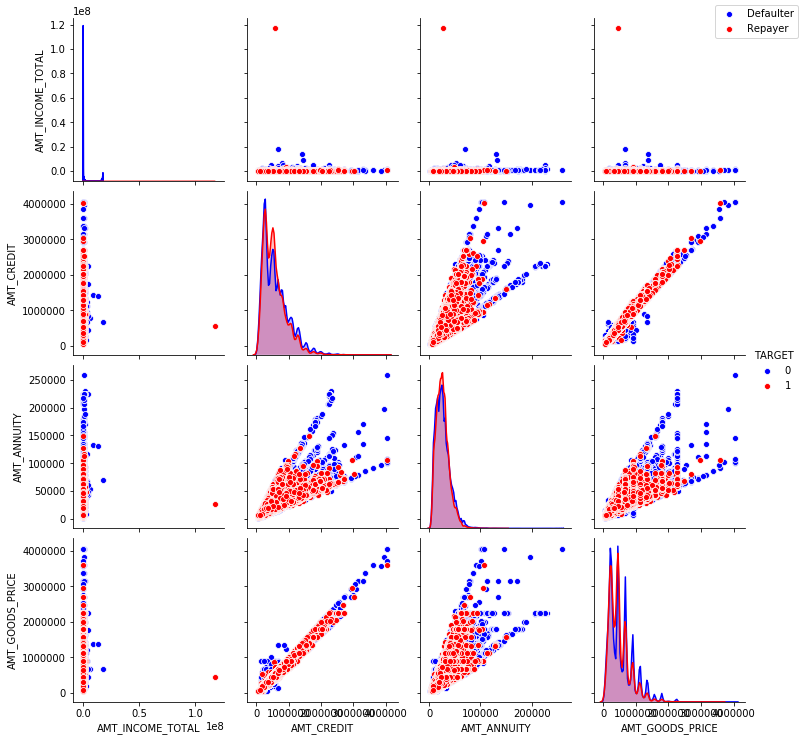

In [99]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

###### 1)There are very less defaulters for AMT_CREDIT >20 Lakhs
###### 2)When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters

### Correlation 

In [100]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEE

In [101]:
target0_corr=Target0.iloc[0:,2:]
target1_corr=Target1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [102]:
def targets_corr(data,title):
    plt.figure(figsize=(22, 18))
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 50
    sns.heatmap(data, cmap="RdYlGn",annot=True, linewidth =1)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

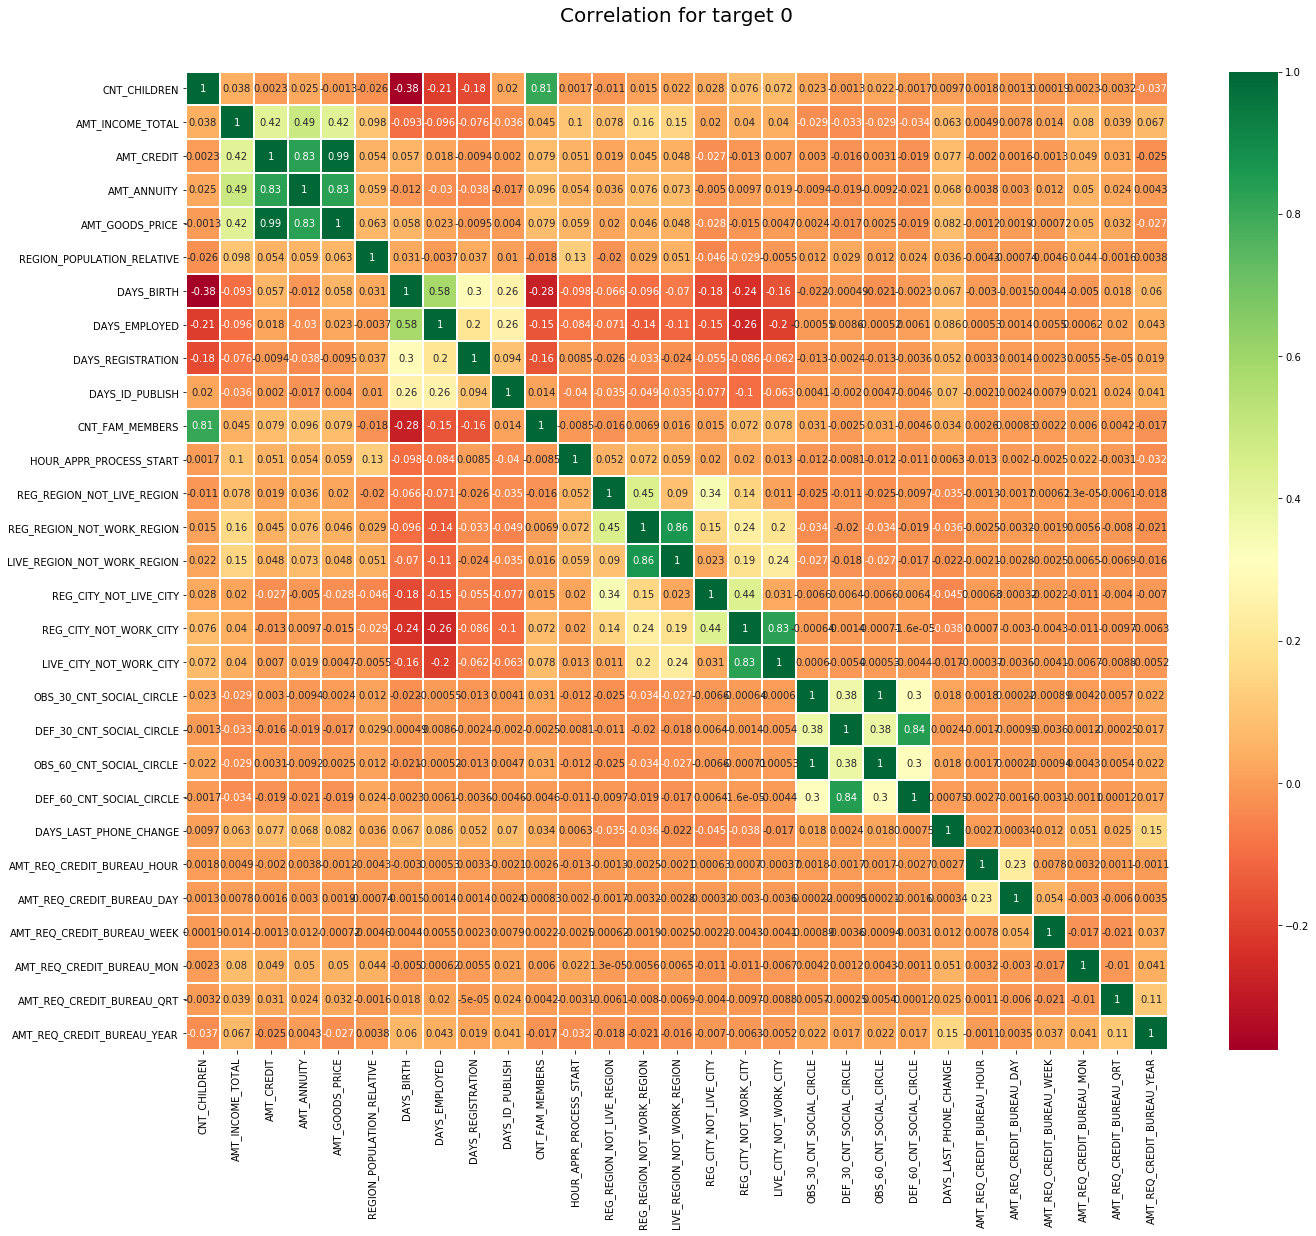

In [103]:
targets_corr(data=target0,title='Correlation for target 0')

###### From this correlation heatmap we can see that:
###### 1)Credit amount is highly correlated with Goods Price Amount and Loan Annuity
###### 2)AMT_CREDIT is inversely proportional to the CNT_CHILDREN, means the Credit amount is higher for fewer children count have and vice-versa.
###### 3)CNT_CHILDREN is also inversely proportional to Days_BIRTH.

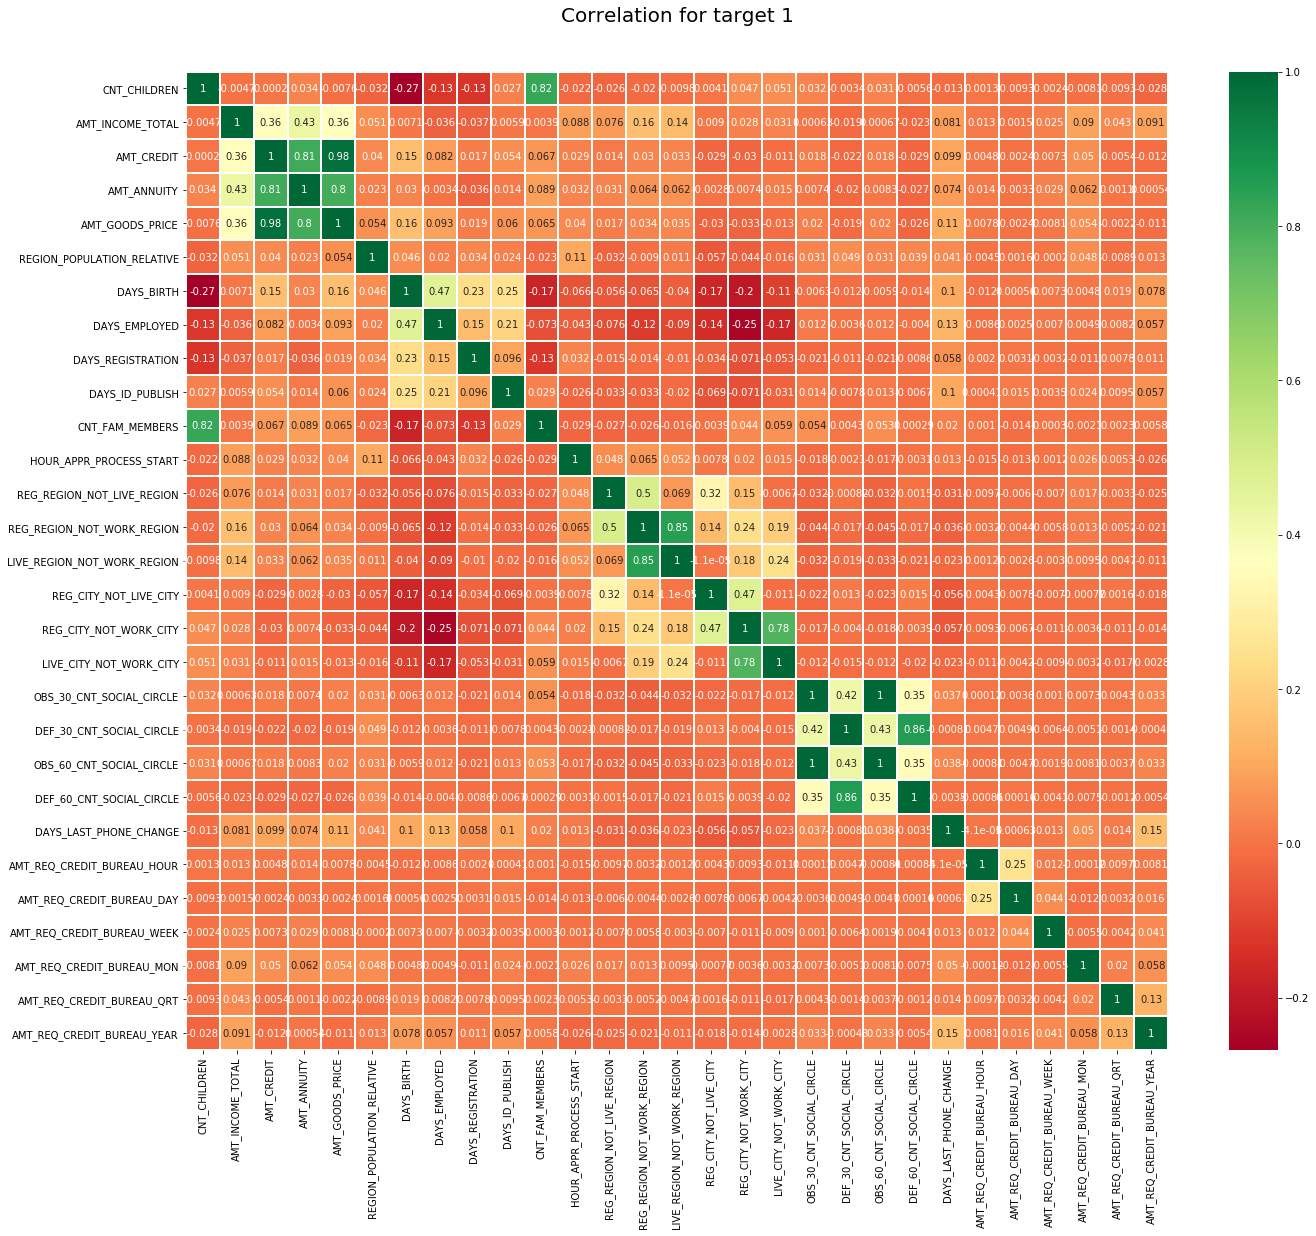

In [104]:
targets_corr(data=target1,title='Correlation for target 1')

###### 1) Credit amount is highly correlated with good price amount which is same as target0.
###### 2) Loan annuity correlation with credit amount has slightly reduced in target1(0.81) when compared to target0(0.83)
###### 3) People permanent address does not match the contact address are having fewer children.
###### 4) Days_birth and number of children correlation has reduced target1 when compared to target0.

## Merging app_data with pre_app

In [105]:
bank_loan= pd.merge(app_data, pre_app, how='inner', on='SK_ID_CURR')
bank_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TYPE,AMT_CREDIT_TYPE,AMT_GOODS_PRICE_1,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637.0,3648.0,2120.0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,MEDIUM,LOW,LOW,Very_Young,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,HIGH,Middle_Age,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,3
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,HIGH,Middle_Age,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,3
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188.0,1186.0,291.0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,HIGH,Middle_Age,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,7
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225.0,4260.0,2531.0,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,VERY_LOW,VERY_LOW,VERY_LOW,Middle_Age,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XN

In [106]:
bank_loan.shape

(1413701, 76)

In [107]:
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 76 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE_x            1410175 non-null  category
 12  NAME_INCOME_TYPE            

In [108]:
loan_Target0 = bank_loan[bank_loan['TARGET']==0] # Repayers
loan_Target1 = bank_loan[bank_loan['TARGET']==1] # Defaulters

#### Univariate analysis

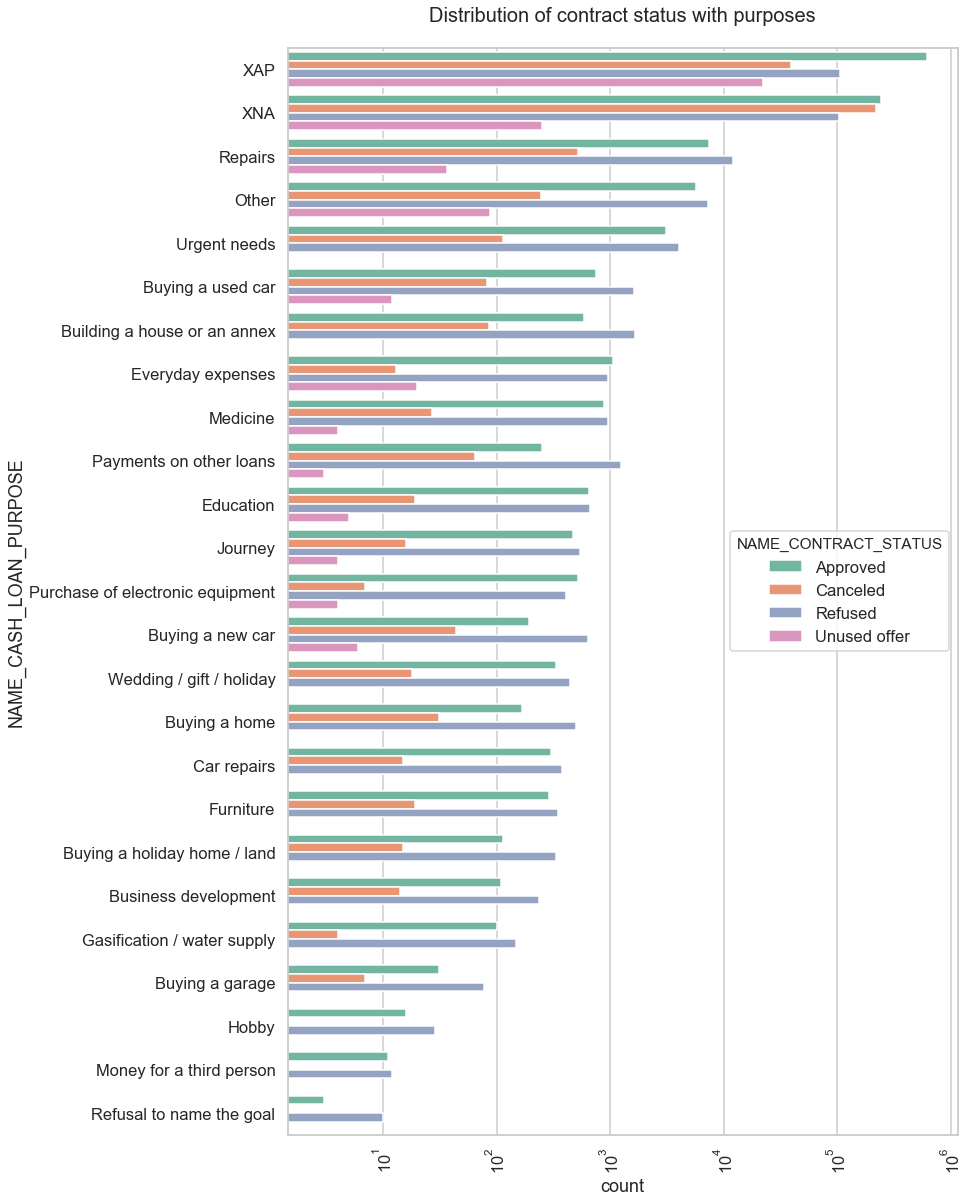

In [109]:
# 'Distribution of contract status with purposes'
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(12,20))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 26
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = bank_loan, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=bank_loan['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='Set2') 

###### 1)For repairs there are most of the rejection for loan.
###### 2)Loan purpose has high number of unknown values (XAP, XNA).
###### 3)For Education purpose we have equal number of approval and rejection.

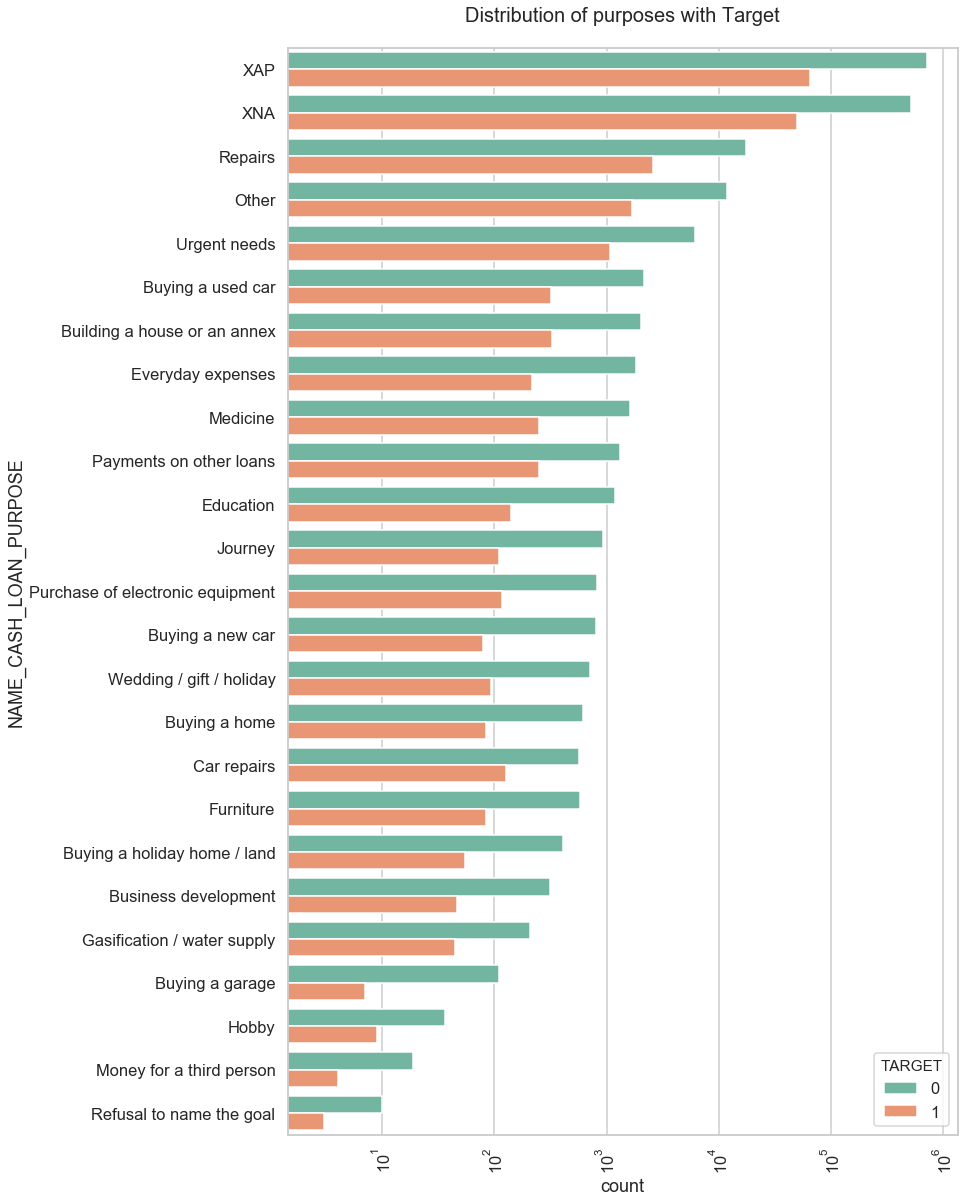

In [110]:
# 'Distribution of purposes with Target'
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(12,20))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 26
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with Target')
ax = sns.countplot(data = bank_loan, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=bank_loan['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='Set2') 

###### 1)Loan purposes with 'Repairs' are facing more difficulites in payment on time.
###### 2)In Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' loan payment is significant higher than facing difficulties.

#### Bivariate analysis

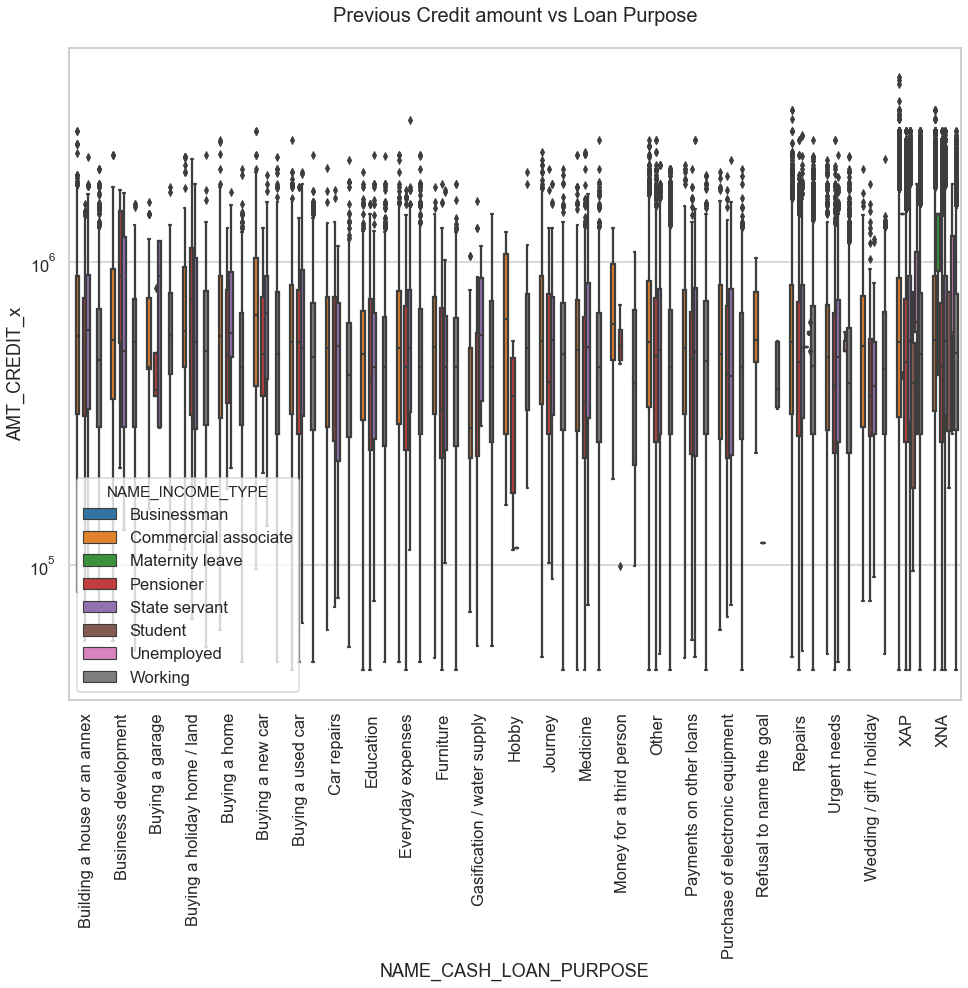

In [111]:
# Boxplot for Previous Credit amount vs Loan Purpose
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =bank_loan, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_x')
plt.title('Previous Credit amount vs Loan Purpose')
plt.show()

###### 1)Income type of state servants have a significant amount of credit applied
###### 2)Money for third person or a Hobby is having less credits applied for.

## Conclusion

##### After analysing the data we found that:
#####     Academic degree has less defaults.
#####     Student and Businessmen have no defaults.
#####     RATING 1 is safer.    
#####     People with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%
#####     People above age of 50 have low probability of defaulting
#####     People with 40+ year experience having less than 1% default rate
#####     Applicant with Income more than 700,000 are less likely to default
#####     Loans bought for Hobby, Buying garage are being repayed mostly.
#####     People with zero to two children tend to repay the loans.


##### Men are at relatively higher default rate.
##### People who have civil marriage or who are single default a lot.
##### people with Maternity leave OR Unemployed default a lot.
##### Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff default rate is huge.
##### young people who are in age group of 20-40 have higher probability of defaulting
##### When the credit amount goes beyond 3lakhs, there is an increase in defaulters.